# Create Potential Fast Transient List

Author: Melissa Graham & Midori Rollins

Identify potential fast transients from the "good" candidates created for all of the DDF.

To do this, we constrain the time spans, peak magnitudes, and amplitudes

**Short-duration transient phenomena**:

 * Short timespan (2 to 20 days) in every filter.
 * Reaches a peak of at least 22 mag in any filter.
 * Has an amplitude of at least 0.5 mag in any filter.

Write the list of potential SNIa to `potential_fast_transients_list.txt`.

Save the plot of every potential SNIa lightcurve in the folder `all_potential_fast_transients_plots/`.

## Set up and read in data

In [563]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

In [564]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

In [565]:
all_filters = ['g', 'r', 'i']
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']
sym = ['o', 's', '^', 'o', 's', '^']
siz = [5, 5, 7, 5, 5, 7]

In [566]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

In [567]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

---
## Testing other constraints

From Maria Drouts paper <a href="https://arxiv.org/abs/1405.3668">here</a>, I find a couple constraints I want to try to implement:
>1. The transient must rise by & 1.5 mag in the 9 days immediately prior to observed maximum light.

>2. The transient must decline by & 1.5 mag in ∼ 25 days post observed maximum.

These two are similar, so if I can implement one, I should be able to do the other. I'll start with `#1.` 

In [568]:
# %%time
# slope = []
# rise_time = []
# for i in range(len(paramLC_candid[:50])):
#     tx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g')))[0]
#     # try:
#     if len(tx) > 1: 
#         tx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mag ==candLC_mag[tx].min()))[0]
#     # except ValueError:
#     #     pass
#     min_date = np.unique(candLC_mjd[tx2])[0]
#     tx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mjd <= min_date))[0]
#     # if any(j > 0 for j in candLC_mag[tx3]):
#     #     rise_mag = candLC_mag[tx3[0]] - candLC_mag[tx3[-1]]
#     #     rise_time = candLC_mjd[tx3[-1]] - candLC_mjd[tx3[0]]
#     #     slope.append(rise_mag/rise_time)
#     if len(candLC_mag[tx3]) > 1:
#         rise_mag = candLC_mag[tx3[0]] - candLC_mag[tx3[-1]]
#         rise_t = candLC_mjd[tx3[-1]] - candLC_mjd[tx3[0]]
#         rise_time.append(candLC_mjd[tx3[-1]] - candLC_mjd[tx3[0]])
#         slope.append(rise_mag/rise_t)
#     else:
#         rise_mag = -99.0
#         rise_time.append(-99.0)
#         slope.append(-99.0)
# del tx, tx2, tx3
# slope = np.array(slope)
# rise_time = np.array(rise_time)

In [569]:
%%time
gslope = []
rslope = []
islope = []
grise_time = []
rrise_time = []
irise_time = []
for i in range(len(paramLC_candid)):
    gtx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g')))[0]
    if len(gtx) > 1: 
        gtx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mag ==candLC_mag[gtx].min()))[0]
    gmin_date = np.unique(candLC_mjd[gtx2])[0]
    gtx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mjd <= gmin_date))[0]
    if len(candLC_mag[gtx3]) > 1:
        grise_mag = candLC_mag[gtx3[0]] - candLC_mag[gtx3[-1]]
        grise_t = candLC_mjd[gtx3[-1]] - candLC_mjd[gtx3[0]]
        grise_time.append(candLC_mjd[gtx3[-1]] - candLC_mjd[gtx3[0]])
        gslope.append(grise_mag/grise_t)
    else:
        grise_mag = -99.0
        grise_time.append(99.0)
        gslope.append(-99.0)
    
    rtx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r')))[0]
    if len(rtx) > 1: 
        rtx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r') & (candLC_mag ==candLC_mag[rtx].min()))[0]
    rmin_date = np.unique(candLC_mjd[rtx2])[0]
    rtx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r') & (candLC_mjd <= rmin_date))[0]
    if len(candLC_mag[rtx3]) > 1:
        rrise_mag = candLC_mag[rtx3[0]] - candLC_mag[rtx3[-1]]
        rrise_t = candLC_mjd[rtx3[-1]] - candLC_mjd[rtx3[0]]
        rrise_time.append(candLC_mjd[rtx3[-1]] - candLC_mjd[rtx3[0]])
        rslope.append(rrise_mag/rrise_t)
    else:
        rrise_mag = -99.0
        rrise_time.append(99.0)
        rslope.append(-99.0)
    
    itx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i')))[0]
    if len(itx) > 1: 
        itx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i') & (candLC_mag ==candLC_mag[itx].min()))[0]
    imin_date = np.unique(candLC_mjd[itx2])[0]
    itx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i') & (candLC_mjd <= imin_date))[0]
    if len(candLC_mag[itx3]) > 1:
        irise_mag = candLC_mag[itx3[0]] - candLC_mag[itx3[-1]]
        irise_t = candLC_mjd[itx3[-1]] - candLC_mjd[itx3[0]]
        irise_time.append(candLC_mjd[itx3[-1]] - candLC_mjd[itx3[0]])
        islope.append(irise_mag/irise_t)
    else:
        irise_mag = -99.0
        irise_time.append(99.0)
        islope.append(-99.0)
        
gslope = np.array(gslope)
rslope = np.array(rslope)
islope = np.array(islope)
grise_time = np.array(grise_time)
rrise_time = np.array(rrise_time)
irise_time = np.array(irise_time)

# del gtx, rtx, itx, gtx2, rtx2, itx2, gtx3, rtx3, itx3

CPU times: user 4min 29s, sys: 27 ms, total: 4min 29s
Wall time: 4min 29s


---

## Identify potential fast transients

We end up using just a single line in the amplitude _vs._ time span plane. It's the dashed line in the plots below.

> **NOTE** - **2023-03-07** - the conditions have been RELAXED to allow for a larger number of potential SNIa (also fast transients?)

In [674]:
# fig, ax = plt.subplots( 1, 3, figsize=(17,5), sharex=True, sharey=True )

### plot all the candidates in parameter space of timespan vs amplitude
tx = np.where((((paramLC_field == 'COSMOS') & (paramLC_tspan_g >= 4) & (paramLC_tspan_g <= 40)) & 
               ((paramLC_tspan_r >= 4) & (paramLC_tspan_r <= 40)) & 
               ((paramLC_tspan_i >= 4) & (paramLC_tspan_i <= 40))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
# tx2 = np.where(((gslope[tx] >= 1.5/9) & (grise_time[tx] <10))|((rslope[tx] >= 1.5/9) & (rrise_time[tx] <10))|((islope[tx] >= 1.5/9) & (irise_time[tx] <10)))
# print('Number of potential fast transients in COSMOS: ',len(tx2[0]))
# ax[0].plot(paramLC_tspan_g[tx][tx2], paramLC_amp_g[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[0], label='COSMOS')
# ax[1].plot(paramLC_tspan_r[tx][tx2], paramLC_amp_r[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[1], label='COSMOS')
# ax[2].plot(paramLC_tspan_i[tx][tx2], paramLC_amp_i[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[2], label='COSMOS')
del tx
tx = np.where((((paramLC_field == 'ELAIS') & (paramLC_tspan_g >= 4) & (paramLC_tspan_g <= 40)) & 
               ((paramLC_tspan_r >= 4) & (paramLC_tspan_r <= 40)) & 
               ((paramLC_tspan_i >= 4) & (paramLC_tspan_i <= 40))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
# tx2 = np.where(((gslope[tx] >= 1.5/9) & (grise_time[tx] <10))|((rslope[tx] >= 1.5/9) & (rrise_time[tx] <10))|((islope[tx] >= 1.5/9) & (irise_time[tx] <10)))
# print('Number of potential fast transients in ELAIS: ',len(tx2[0]))
# ax[0].plot(paramLC_tspan_g[tx][tx2], paramLC_amp_g[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[3], label='ELAIS')
# ax[1].plot(paramLC_tspan_r[tx][tx2], paramLC_amp_r[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[4], label='ELAIS')
# ax[2].plot(paramLC_tspan_i[tx][tx2], paramLC_amp_i[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[5], label='ELAIS')
del tx

# for f in range(3):
#     ax[f].axvline(2, lw=1, ls='dashed', color='black')
#     ax[f].axvline(20, lw=1, ls='dashed', color='black')
#     ax[f].axhline(0.5, lw=1, ls='dashed', color='black')
    
# Flag which candidates satisfy constraints in at least 2 bands
paramLC_potft = np.zeros( len(paramLC_field), dtype='int' )

tx = np.where((((paramLC_tspan_g >= 4) & (paramLC_tspan_g <= 40)) & 
               ((paramLC_tspan_r >= 4) & (paramLC_tspan_r <= 40)) & 
               ((paramLC_tspan_i >= 4) & (paramLC_tspan_i <= 40))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]

for t in tx:
    cntr = 0
    if (gslope[t] >= 1.5/9) & (grise_time[t] < 10):
        cntr += 1
    if (rslope[t] >= 1.5/9) & (rrise_time[t] < 10):
        cntr += 1
    if (islope[t] >= 1.5/9) & (irise_time[t] < 10):
        cntr += 1

    if (cntr == 2) | (cntr == 3):
        paramLC_potft[t] = 1
    
    del cntr
del tx

tx = np.where( (paramLC_potft == 1) & (paramLC_field == 'COSMOS') )[0]
print('Number of potential fast transients in COSMOS: ',len(tx))
# ax[0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[0], label='COSMOS')
# ax[1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[1], label='COSMOS')
# ax[2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[2], label='COSMOS')
del tx
tx = np.where( (paramLC_potft == 1) & (paramLC_field == 'ELAIS') )[0]
print('Number of potential fast transients in ELAIS: ',len(tx))
# ax[0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[3], label='ELAIS')
# ax[1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[4], label='ELAIS')
# ax[2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[5], label='ELAIS')
del tx

# ### finish up the plot and show it
# ax[0].set_xlim([-1,25])
# ax[1].set_xlim([-1,25])
# ax[2].set_xlim([-1,25])
# ax[0].set_ylim([0.,2.5])
# ax[1].set_ylim([0.,2.5])
# ax[2].set_ylim([0.,2.5])
# ax[0].set_ylabel('amplitude')
# # ax[1,0].set_ylabel('amplitude')
# ax[0].set_xlabel('time span')
# ax[1].set_xlabel('time span')
# ax[2].set_xlabel('time span')
# ax[0].legend(loc='best',fontsize=10)
# ax[1].legend(loc='best',fontsize=10)
# ax[2].legend(loc='best',fontsize=10)
# plt.show()

Number of potential fast transients in COSMOS:  0
Number of potential fast transients in ELAIS:  1


### Write the list of potential fast transients to file

In [675]:
fout = open('potential_fast_transients_list.dat', 'w')
tx = np.where(paramLC_potft == 1)[0]
for x in tx:
    fout.write(paramLC_candid[x]+'\n')
fout.close()
print('Number of potential fast transients: ', len(tx))
del tx

Number of potential fast transients:  1


### Plot the potential fast transient lightcurves

Display the time span and the amplitude in the upper left corner.

Some appear to be "short duration" just by being partial lightcurves,
but at least DC22icaog seems to have a rise and fall, just over two weeks.

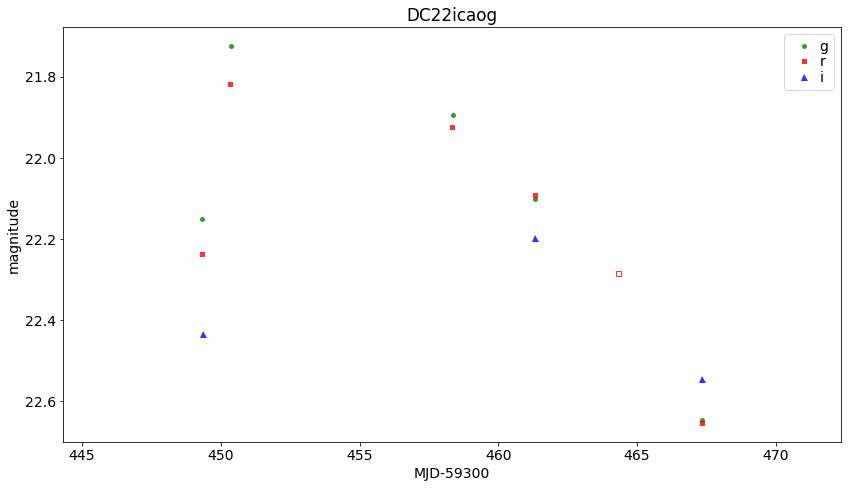

In [676]:
sx = np.where(paramLC_potft == 1)[0]
np.random.shuffle(sx)

# fig, ax = plt.subplots( 1, 1, figsize=(16,24), sharex=False, sharey=False )
plt.figure(figsize=(12,7))


s = 0
for i in range(1):
    plt.ylabel('magnitude', fontsize=14)
    for j in range(1):
        for f,filt in enumerate(all_filters):
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
            cx2 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
            plt.plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
            plt.plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
            plt.plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                         all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
            if f == 0:
                xmin = 60000.
                xmax = 0.
                if (len(cx0) > 0):
                    xmin = np.min(candLC_mjd[cx0])
                    xmax = np.max(candLC_mjd[cx0])
                elif (len(cx0) > 0) & (len(cx1) > 0):
                    xmin = np.min([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
                    xmax = np.max([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
            elif f > 0:
                if (len(cx0) > 0):
                    xmin = np.min([xmin, np.min(candLC_mjd[cx0])])
                    xmax = np.max([xmax, np.min(candLC_mjd[cx0])])
                elif (len(cx0) > 0) & (len(cx1) > 0):
                    xmin = np.min([xmin, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
                    xmax = np.max([xmax, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
                
            del cx0, cx1, cx2
        plt.gca().invert_yaxis()
        plt.xlim([xmin-59300.-5, xmax-59300.+5])
        del xmin, xmax
        plt.title(paramLC_candid[sx[s]])
        s += 1

plt.legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(5):
    plt.xlabel('MJD-59300', fontsize=14)

plt.tight_layout()
plt.show()
del sx, s

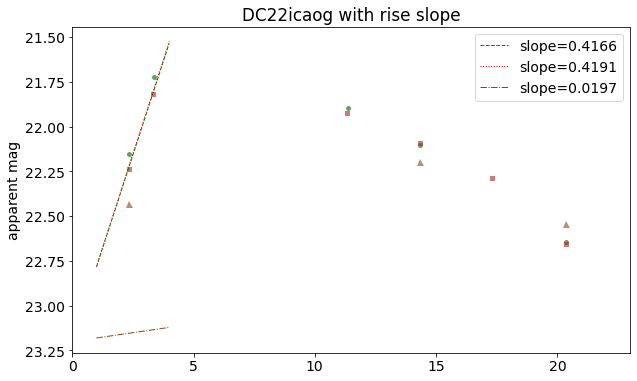

In [680]:
tx = np.where((((paramLC_tspan_g >= 4) & (paramLC_tspan_g <= 40)) & 
               ((paramLC_tspan_r >= 4) & (paramLC_tspan_r <= 40)) & 
               ((paramLC_tspan_i >= 4) & (paramLC_tspan_i <= 40))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
tx2 = np.where((gslope[tx] >= 1.5/9) & (grise_time[tx] <10))

gtx = np.where((candLC_candid == 'DC22icaog') & (candLC_filter == 'g'))
rtx = np.where((candLC_candid == 'DC22icaog') & (candLC_filter == 'r'))
itx = np.where((candLC_candid == 'DC22icaog') & (candLC_filter == 'i'))

plt.figure(figsize=(10,6))

plt.plot(candLC_mjd[gtx]-59747., candLC_mag[gtx], sym[0], ms=siz[0], mew=0, alpha=0.6, color=clr[0])
plt.plot(candLC_mjd[rtx]-59747., candLC_mag[rtx], sym[1], ms=siz[1], mew=0, alpha=0.6, color=clr[1])
plt.plot(candLC_mjd[itx]-59747., candLC_mag[itx], sym[2], ms=siz[2], mew=0, alpha=0.6, color=clr[2])
del gtx, rtx, itx

# gtx = np.where(dec_df['band']=='g')
# rtx = np.where(dec_df['band']=='r')
# itx = np.where(dec_df['band']=='i')
# plt.plot(dec_df['mjd'][gtx[0]]-57983,dec_df['mag'][gtx[0]]+1.5, c='green', label='g')
# plt.plot(dec_df['mjd'][rtx[0]]-57983,dec_df['mag'][rtx[0]]+2.5, c='red', label='r')
# plt.plot(dec_df['mjd'][itx[0]]-57983,dec_df['mag'][itx[0]]+3, c='brown', label='i')
# del gtx, rtx, itx

x = [ 1, 2, 3, 4]
gy = [-(gslope[tx][tx2][0]*i)+ 23.2 for i in x]
ry = [-(rslope[tx][tx2][0]*i)+ 23.2 for i in x]
iy = [-(islope[tx][tx2][0]*i)+ 23.2 for i in x]
# slope, intercept = np.polyfit(x, y, 1)
# abline_values = [-slope * i + intercept for i in x]
plt.plot(x, gy, c='green', lw=1, ls='dashed', label =f'slope={gslope[tx][tx2][0]:.4f}')
plt.plot(x, ry, c='red', lw=1, ls='dotted', label =f'slope={rslope[tx][tx2][0]:.4f}')
plt.plot(x, iy, c='saddlebrown', lw=1, ls='dashdot', label =f'slope={islope[tx][tx2][0]:.4f}')
del x, gy, ry, iy, tx, tx2
plt.ylabel('apparent mag')
plt.title('DC22icaog with rise slope')
plt.xlim(0, 23)

plt.gca().invert_yaxis()
plt.legend()
plt.show()

### Save individual plots as PNG files

In [681]:
# sx = np.where((((paramLC_tspan_g >= 4) & (paramLC_tspan_g <= 40)) & 
#                ((paramLC_tspan_r >= 4) & (paramLC_tspan_r <= 40)) & 
#                ((paramLC_tspan_i >= 4) & (paramLC_tspan_i <= 40))) & 
#               ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
#               ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
# sx2 = np.where((slope[sx] >= 1.5/9) & (rise_time[sx] <10))
# plt.rcParams.update({'font.size': 14})

# for x in range(len(sx[sx2])):
#     plt.figure(figsize=(8,6))
    
#     for f,filt in enumerate(all_filters):
#         clr_i = f
#         if paramLC_field[sx][sx2][0] == 'ELAIS':
#             clr_i = f+3
#         cx0 = np.where((candLC_candid == paramLC_candid[sx][sx2][0]) & \
#                        (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
#         cx1 = np.where((candLC_candid == paramLC_candid[sx][sx2][0]) & \
#                        (candLC_filter == filt) & (candLC_mrb <= 0.4))[0]
#         plt.plot( candLC_mjd[cx0]-59300., candLC_mag[cx0], 
#                      sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i], label=filt )
#         plt.plot( candLC_mjd[cx1]-59300., candLC_mag[cx1], 
#                      sym[clr_i], ms=siz[clr_i], mew=1, alpha=0.6, mec=clr[clr_i], color='none', label=filt+' (R/B<0.4)' )
#         del cx0, cx1
#     plt.gca().invert_yaxis()
#     plt.legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)
#     plt.title(paramLC_candid[sx][sx2][0], fontsize=14)
    # plt.text(0.70, 0.85, str(np.round(paramLC_tspan[sx][sx2][0],0)), fontsize=12, color='black')
    # plt.text(0.70, 0.75, str(np.round(paramLC_amp[sx][sx2][0],1)), fontsize=12, color='black')
    
    # plt.xlabel('MJD-59300', fontsize=14)
    # plt.ylabel('mag',fontsize=14)
    # plt.savefig('all_potential_fast_transients_plots/'+paramLC_candid[sx][sx2[x]][0]+'.png')
    # plt.close()

# del sx

In [682]:
sx = np.where(paramLC_potft == 1)[0]
plt.rcParams.update({'font.size': 14})

for x in range(len(sx)):
    plt.figure(figsize=(8,6))
    
    for f,filt in enumerate(all_filters):
        cx0 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
        cx1 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
        cx2 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
        plt.plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                 all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
        plt.plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                 all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f], 
                 label=filt+' (R/B<0.4)')
        plt.plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                 all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
        if f == 0:
            xmin = 60000.
            xmax = 0.
            if (len(cx0) > 0):
                xmin = np.min(candLC_mjd[cx0])
                xmax = np.max(candLC_mjd[cx0])
            elif (len(cx0) > 0) & (len(cx1) > 0):
                xmin = np.min([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
                xmax = np.max([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
        elif f > 0:
            if (len(cx0) > 0):
                xmin = np.min([xmin, np.min(candLC_mjd[cx0])])
                xmax = np.max([xmax, np.min(candLC_mjd[cx0])])
            elif (len(cx0) > 0) & (len(cx1) > 0):
                xmin = np.min([xmin, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
                xmax = np.max([xmax, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
        del cx0, cx1, cx2
    plt.gca().invert_yaxis()
    plt.title(paramLC_candid[sx[x]])
    plt.legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    plt.xlim([xmin-59300.-5, xmax-59300.+5])
    del xmin, xmax
    plt.xlabel('MJD-59300', fontsize=14)
    plt.ylabel('mag', fontsize=14)
    plt.savefig('all_potential_fast_transients_plots/'+paramLC_candid[sx[x]]+'.png')
    plt.close()

del sx

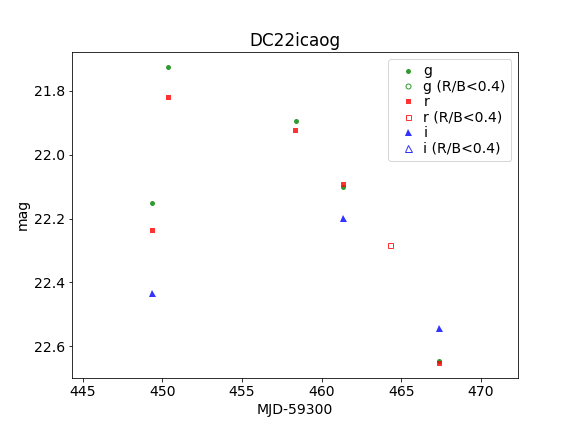

In [658]:
from IPython.display import display, Image
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC22icaog.png',width=450)
display(image)